Durante lo studio vengono quindi
esplorate tutte le caratteristiche di questa rete tag-tag, confrontandola
con alcuni modelli standard: Barabási-Albert,
Erdös–Rényi,Watts–Strogatz, Configuration Model.

#### usando un modello Barabasi Albert viene costruito un network con lo stesso numero di nodi e edges del nostro dataset 

#### si analizzano quindi vari aspetti della rete cosi costruita (da path analysis in poi si riscontrano problemi di costo computazionale, per questo motivo non so se applicare una parte ridotta del dataset ossia quella a 3k nodi usando path1 ecc)

queste reti prodotte servono per network analysis in generale dei notebook dopo 
l'analisi quindi penso sia inutile anche vedendo il progetto di m

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from operator import itemgetter
import powerlaw
from networkx.drawing.nx_agraph import graphviz_layout
import pickle
from statistics import mean, stdev
import seaborn as sns

In [2]:
from net_analysis import *

In [3]:
path = "../Dataset FFF/edges.csv"

In [4]:
path_graph = "../Dataset FFF/Graph_data/"

In [6]:
G = nx.read_edgelist(path, comments = "S", delimiter = ",", data=(("Count", int),))

In [7]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 8786
Number of edges: 34505
Average degree:   7.8545


In [8]:
ba_G = nx.barabasi_albert_graph(G.number_of_nodes(), 7, seed = 42)
print("Nodes:",ba_G.number_of_nodes())
print("Edges:",ba_G.number_of_edges())

Nodes: 8786
Edges: 61453


In [9]:
nx.write_graphml(ba_G, path_graph+"BA_Network.graphml")

# 1 - Degree Distribution

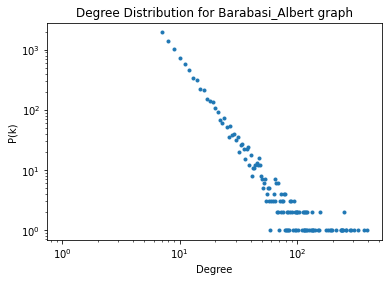

In [10]:
degree_dist(ba_G, "Barabasi_Albert", "BA")

Calculating best minimal value for power law fit
**** Degree Distribution for Barabasi_Albert graph ****


C:\Users\marco\Documents\sna-project-2022_cosmo_d-arrigo_esposito\2 - NetworkAnalysis\net_analysis.py:40: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim((min(degree), max(degree)))


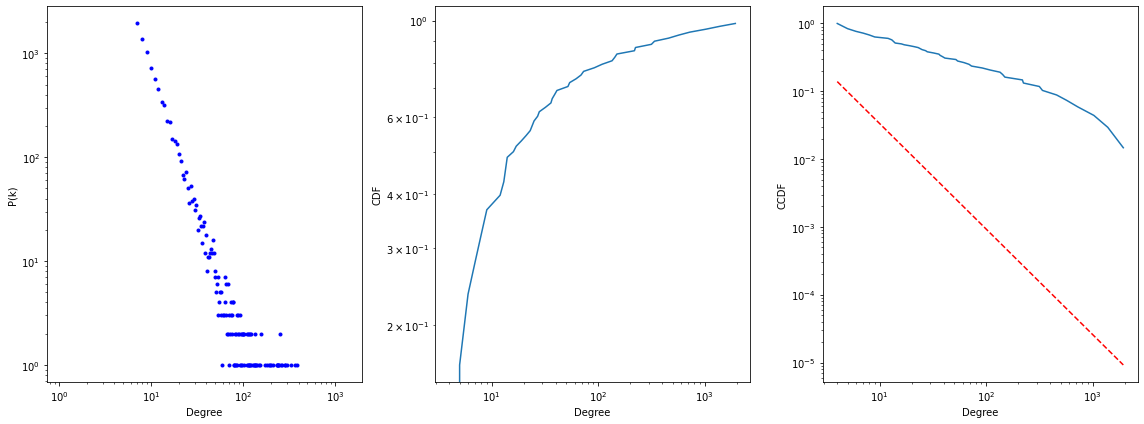

alpha=2.5557500513314166 sigma=0.06739459303181963


In [11]:
plot_dist(ba_G, "Barabasi_Albert", "BA")

In [12]:
info_degree(ba_G , "Barabasi_Albert")

***** Degree info for Barabasi_Albert graph ***
Maximum degree: (389, 8)
Minimum degree: (7, 1607)


# 2 - Connected Components

In [14]:
components = n_connected_components(ba_G , "Barabasi_Albert")

**** Connected components for Barabasi_Albert graph ****
Number of Connected Components for Barabasi_Albert: 1
	 component len = 8786


# 3 - Path Analysis

In [16]:
path_analysis(ba_G , "Barabasi_Albert", components)

***** Path analysis for Barabasi_Albert graph
Diameter for components 0 network Barabasi_Albert: 5
Average shortest path for components 0 network Barabasi_Albert: 3.3223698228451353


# 4 - Clustering Coefficient 

In [17]:
name, values = c_coefficient_analysis(ba_G , "Barabasi_Albert")

*** Clustering coefficient analyssi for Barabasi_Albert graph ***
Min: 0
Max: 0.19047619047619047
Mean: 0.00957394548189972
Stdev: 0.01807325909428149


**** Distribution degree/clustering for Barabasi_Albert graph ***


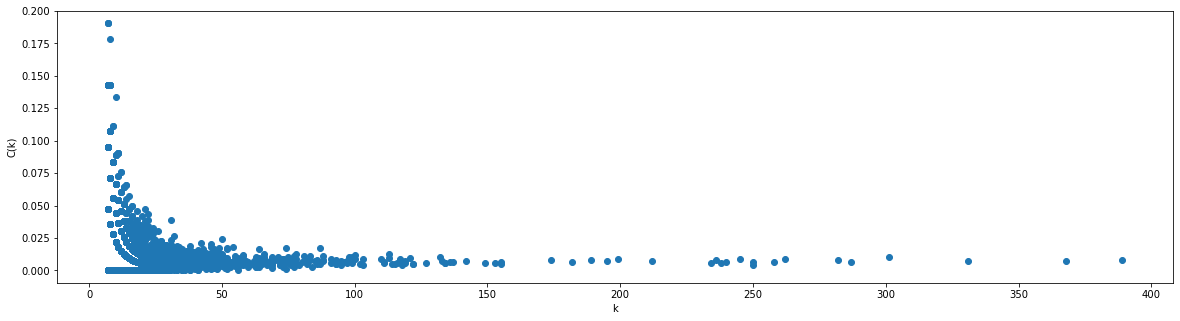

In [18]:
degree_clustering(ba_G , "Barabasi_Albert", "BA")

# 5 - Density Analysis

In [19]:
density_analysis(ba_G , "Barabasi_Albert")

Density for Barabasi_Albert graph: 0.001592355821421802
